In [1]:
#Import the required libraries
import pandas as pd
from scipy.stats import mode
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')


In [2]:
train_data = pd.read_csv('../notebook/cleaned_train_data.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

In [3]:
train_data.head()

,Unnamed: 0,donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0,5,101,87.0,0,X,5,54,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,1,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0,38,92,60.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
test_data

,Unnamed: 0,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,139,101,59.0,0,R,2,46,U,F,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,1,142,137,59.0,0,R,2,43,U,F,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,2,282,17,30.0,0,T,1,35,H,M,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,3,368,137,75.0,0,U,1,2,H,M,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,4,387,5,59.0,0,T,2,40,U,F,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2143,190842,101,47.0,1,C,1,24,U,F,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,2144,191056,41,17.0,1,U,1,1,U,M,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,2145,191164,89,55.0,0,X,5,54,U,F,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,2146,191484,65,42.0,1,X,5,54,U,F,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [5]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [6]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   donated                      19372 non-null  int64  
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [9]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

In [11]:
donated = train_data[train_data['donated']==1]
not_donated = train_data[train_data['donated']==0]
donor_count = train_data['donated'].value_counts()[1]
random_selection = not_donated.sample(donor_count)
train_data_under_sampled = pd.concat([donated, random_selection])

In [12]:
train_data_under_sampled.shape

(9686, 48)

In [13]:
train_data_under_sampled['donated'].value_counts()

1    4843
0    4843
Name: donated, dtype: int64

In [14]:
# Selecting the independent variables and the target variable
#
y = train_data['donated']
X = train_data.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [15]:
total_data = pd.concat([X, test_data])

In [16]:
df_numerical = total_data.select_dtypes(include = [np.number])

In [17]:
df_categorical = total_data.select_dtypes(include = [object])

In [18]:
df_categorical = df_categorical.apply(lambda x: x.astype('category'))

In [19]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21520 entries, 0 to 2147
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   urbanicity           21520 non-null  category
 1   home_owner           21520 non-null  category
 2   donor_gender         21520 non-null  category
 3   overlay_source       21520 non-null  category
 4   recency_status_96nk  21520 non-null  category
dtypes: category(5)
memory usage: 273.9 KB


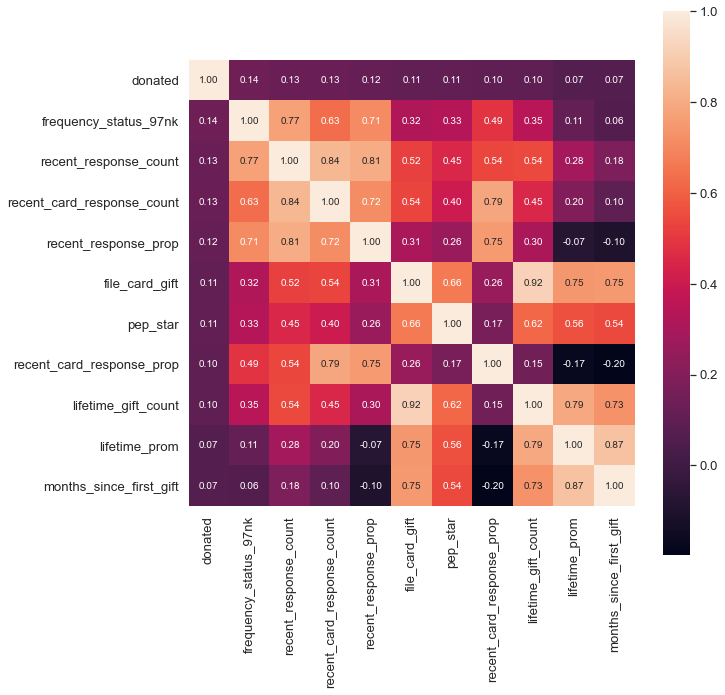

In [21]:
corrmatrix = train_data.corr()
k = 11 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'donated')['donated'].index
cm = np.corrcoef(train_data[cols].values.T)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [22]:
train_data.shape

(19372, 48)

In [23]:
train_data.columns.to_list()

['donated',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 

In [24]:
df_categorical.shape

(21520, 5)

In [25]:
df_categorical.head()

,urbanicity,home_owner,donor_gender,overlay_source,recency_status_96nk
0,X,H,M,P,A
1,R,H,M,P,S
2,S,H,F,P,S
3,U,H,F,B,A
4,R,U,F,B,A


In [26]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [27]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
0,101,87.0,0,5,54,2.0,0,0,5.0,554,...,0,1,0,0,1,0,0,0,0,0
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
2,113,75.0,0,1,11,5.0,0,0,9.0,2388,...,0,0,0,0,1,0,0,0,0,1
3,92,60.0,0,2,4,6.0,1,0,4.0,1688,...,0,0,0,0,0,0,0,0,0,0
4,101,74.0,0,2,49,2.0,1,8,5.0,514,...,1,0,0,0,0,0,0,0,0,0


In [28]:
total_data.shape

(21520, 57)

In [29]:
total_data.columns.to_list()

['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',

In [30]:
total_data.shape

(21520, 57)

In [31]:
total_data.dtypes

months_since_origin              int64
donor_age                      float64
in_house                         int64
ses                              int64
cluster_code                     int64
income_group                   float64
published_phone                  int64
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status               int64
frequency_status_97nk            int64
recent_response_prop           float64
recent_avg_gift_amt            float64
recent_card_response_prop      float64
recent_avg_card_gift_amt       float64
recent_response_count            int64
recent_card_response_coun

In [32]:
independent_variables = ['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']

#### Split the data into test and train data sets
It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.



In [34]:
X =  total_data.iloc[:19372]
X_test_cat_encoded =  total_data.iloc[19372:]
X.shape, X_test_cat_encoded.shape, y.shape

((19372, 57), (2148, 57), (19372,))

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11623, 57)
(7749, 57)
(11623,)
(7749,)


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)


vif : [195.79813615207482, 18.88527902289004, 2.023705068597939, 42.691344018205285, 296.0321622583407, 9.185098649302834, 2.8109915735386246, 1.28121569378032, 9.489961567511378, 6.357111766443386, 32.96222382657267, 23.64516815498198, 18.734553605291648, 1.1098356937556784, 13.425774015494728, 7.961461062295857, 8.828346179841759, 4.603973631395305, 1.5749428620364105, 14.207297117440248, 44.27951502836778, 16.364885654246716, 25.035169785213508, 5.194310281246458, 57.06141704460149, 31.940193712877583, 70.82835820087679, 233.27878548541315, 208.4878962662371, 9.11009778778154, 32.60142377757347, inf, inf, inf, inf, 11.78293820942413, 76.73381966674931, 53.61752146880971, 58.201622058043796, 209.20337617080602, inf, 32.85700096779523, 25.551476389594196, 8.65196028886424, 9.769312237960943, 18.9530615542693, 3.67736107952547, 3.2851820335613655, 1.7925347023442992, 1.146938791414657, 3.2691095333602957, 2.0779439496868335, 1.7212051553727084, 2.3797601911344635, 1.0289621856805404, 1

* **We can notice that VIF analysis has eliminated several features**.
* **Let’s run the first iteration of multivariate regression model with the set of independent variables that has passed the VIF analysis.**

In [38]:
print(independent_variables)

['in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status', 'frequency_status_97nk', 'recent_card_response_prop', 'recent_avg_card_gift_amt', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']


In [39]:
# independent_variables =  ['months_since_origin', 'in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 
# 'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status',
# 'frequency_status_97nk', 'recent_avg_card_gift_amt', 'recent_card_response_count', 'lifetime_gift_amount', 'lifetime_max_gift_amt', 
# 'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 
# 'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 
# 'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']
# use the list to select a subset from original DataFrame
X = X[independent_variables]
X_test_cat_encoded = X_test_cat_encoded[independent_variables]
y = y
X.shape, y.shape, X_test_cat_encoded.shape

((19372, 35), (19372,), (2148, 35))

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:

# define and configure the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7004774809652858
The accuracy score is: 0.7004774809652858 and the f1 score is 0.17077527688460165


              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5871
           1       0.26      0.13      0.17      1878

    accuracy                           0.70      7749
   macro avg       0.51      0.51      0.49      7749
weighted avg       0.64      0.70      0.66      7749



array([[5189,  682],
       [1639,  239]], dtype=int64)

In [42]:

# define and configure the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.629887727448703
The accuracy score is: 0.629887727448703 and the f1 score is 0.28869047619047616


              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5871
           1       0.27      0.31      0.29      1878

    accuracy                           0.63      7749
   macro avg       0.52      0.52      0.52      7749
weighted avg       0.65      0.63      0.64      7749



array([[4299, 1572],
       [1296,  582]], dtype=int64)

In [44]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
dc_impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
dc_impo_df


,importance
feature,
median_home_value,0.1277
pct_attribute4,0.0865
pct_attribute3,0.0863
lifetime_gift_amount,0.0803
recent_avg_card_gift_amt,0.0572
recent_card_response_prop,0.0570
lifetime_gift_count,0.0538
mor_hit_rate,0.0436
last_gift_amt,0.0412


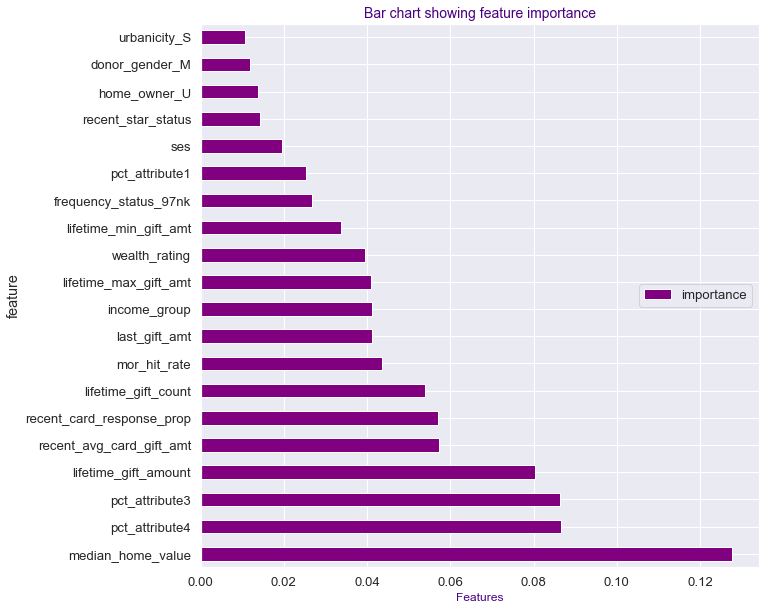

In [45]:
# Creating a bar chart of feature importance in descending order
#
dc_impo_df = dc_impo_df[:20].sort_values(by = 'importance', ascending = False)
dc_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [46]:

# define and configure the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

[22:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.7309330236159505
The accuracy score is: 0.7309330236159505 and the f1 score is 0.1755634638196916


              precision    recall  f1-score   support

           0       0.77      0.93      0.84      5871
           1       0.34      0.12      0.18      1878

    accuracy                           0.73      7749
   macro avg       0.55      0.52      0.51      7749
weighted avg       0.66      0.73      0.68      7749



array([[5442,  429],
       [1656,  222]], dtype=int64)

In [47]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
frequency_status_97nk,0.0730
pep_star,0.0509
recency_status_96nk_E,0.0430
recency_status_96nk_S,0.0336
urbanicity_R,0.0327
donor_gender_U,0.0325
median_home_value,0.0295
lifetime_gift_count,0.0295
income_group,0.0293


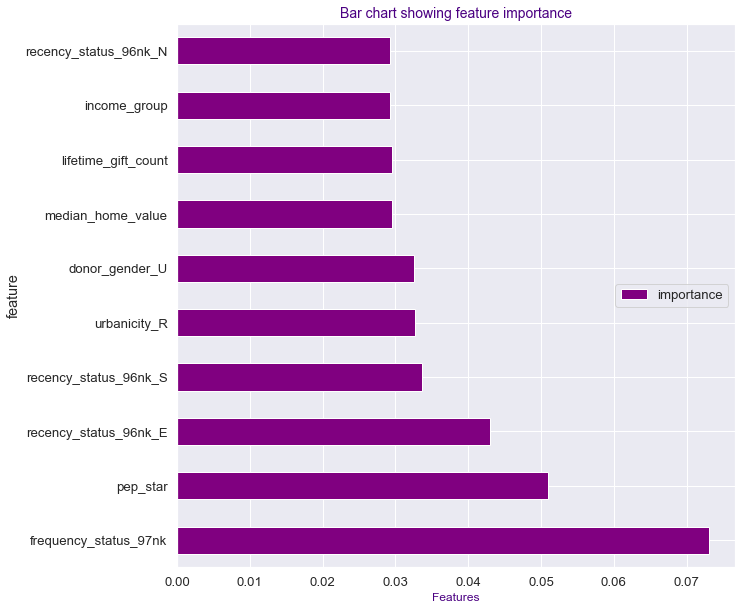

In [48]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [49]:
# define and configure the model
model = CatBoostClassifier(verbose=False)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.749645115498774
The accuracy score is: 0.749645115498774 and the f1 score is 0.07969639468690702


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5871
           1       0.37      0.04      0.08      1878

    accuracy                           0.75      7749
   macro avg       0.56      0.51      0.47      7749
weighted avg       0.67      0.75      0.67      7749



array([[5725,  146],
       [1794,   84]], dtype=int64)

In [50]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df



,importance
feature,
median_home_value,9.1501
pct_attribute4,8.6185
lifetime_gift_amount,7.6987
pct_attribute3,6.3617
recent_avg_card_gift_amt,5.6361
last_gift_amt,5.4998
recent_card_response_prop,5.4396
lifetime_max_gift_amt,4.9285
lifetime_min_gift_amt,4.7065


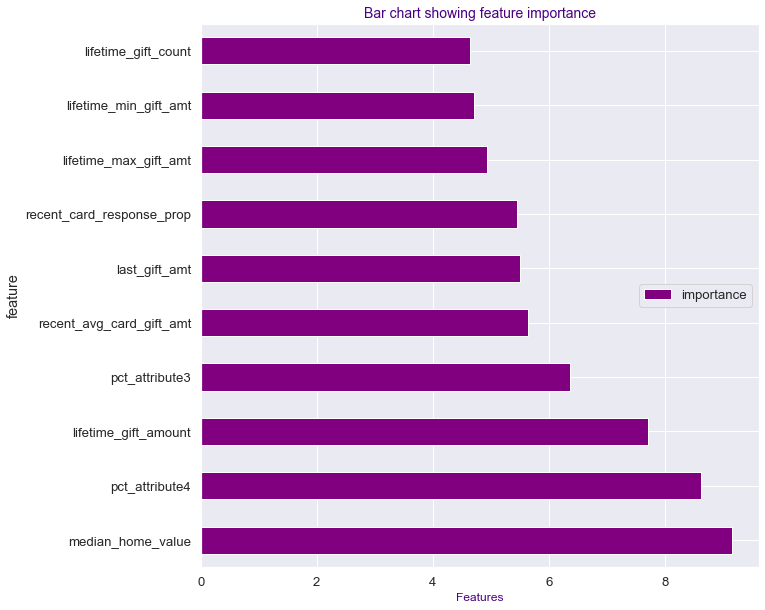

In [51]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [52]:

# define and configure the model

model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.7566137566137566
The accuracy score is: 0.7566137566137566 and the f1 score is 0.0010593220338983053


              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5871
           1       0.10      0.00      0.00      1878

    accuracy                           0.76      7749
   macro avg       0.43      0.50      0.43      7749
weighted avg       0.60      0.76      0.65      7749



array([[5862,    9],
       [1877,    1]], dtype=int64)

In [53]:
# define and configure the model
model = AdaBoostClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7528713382371919
The accuracy score is: 0.7528713382371919 and the f1 score is 0.050570153693604354


              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5871
           1       0.37      0.03      0.05      1878

    accuracy                           0.75      7749
   macro avg       0.56      0.51      0.45      7749
weighted avg       0.66      0.75      0.66      7749



array([[5783,   88],
       [1827,   51]], dtype=int64)

In [54]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
median_home_value,0.12
frequency_status_97nk,0.10
lifetime_gift_amount,0.08
mor_hit_rate,0.08
last_gift_amt,0.08
pct_attribute4,0.08
recent_avg_card_gift_amt,0.08
lifetime_max_gift_amt,0.06
lifetime_min_gift_amt,0.04


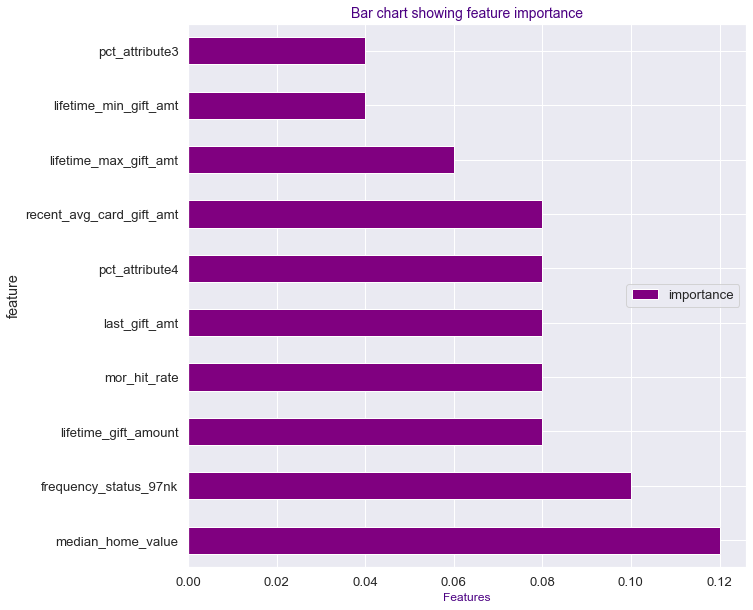

In [55]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [56]:
# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7508065556846044
The accuracy score is: 0.7508065556846044 and the f1 score is 0.06307617661329452


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5871
           1       0.36      0.03      0.06      1878

    accuracy                           0.75      7749
   macro avg       0.56      0.51      0.46      7749
weighted avg       0.66      0.75      0.66      7749



array([[5753,  118],
       [1813,   65]], dtype=int64)

In [57]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0965
pct_attribute4,0.0809
pct_attribute3,0.0773
lifetime_gift_amount,0.0763
recent_card_response_prop,0.0582
recent_avg_card_gift_amt,0.0571
lifetime_gift_count,0.0566
last_gift_amt,0.0494
lifetime_max_gift_amt,0.0472


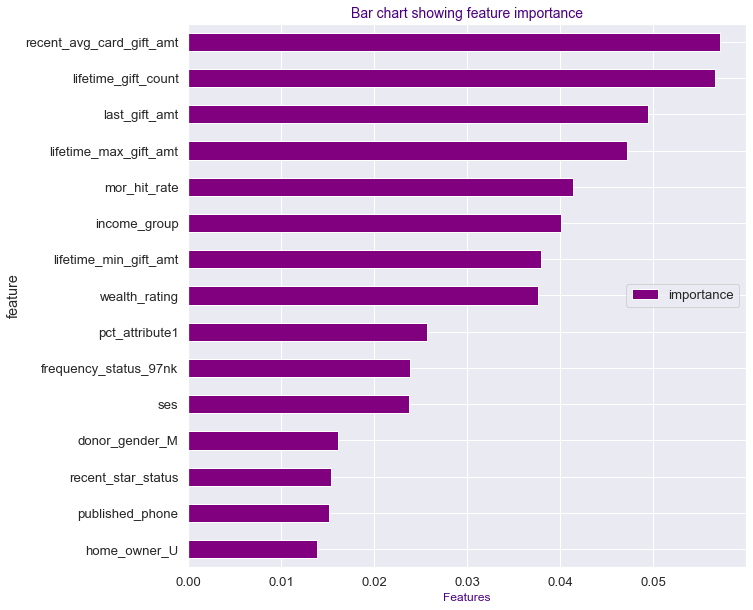

In [60]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:15].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

### Using the most important features to build a random forest model

In [61]:
rf_impo_df.index

Index(['home_owner_U', 'published_phone', 'recent_star_status',
       'donor_gender_M', 'ses', 'frequency_status_97nk', 'pct_attribute1',
       'wealth_rating', 'lifetime_min_gift_amt', 'income_group',
       'mor_hit_rate', 'lifetime_max_gift_amt', 'last_gift_amt',
       'lifetime_gift_count', 'recent_avg_card_gift_amt'],
      dtype='object', name='feature')

# Data Modelling

## Random Forest Classifier

### Remodelling with the most important features only

In [62]:
# Selecting only important features and the y variable
#
X = X[rf_impo_df.index]

y = y


In [63]:
X.shape, y.shape

((19372, 15), (19372,))

In [64]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7432897453544391
The accuracy score is: 0.7432897453544391 and the f1 score is 0.09903381642512075


              precision    recall  f1-score   support

           0       0.76      0.96      0.85      4398
           1       0.34      0.06      0.10      1414

    accuracy                           0.74      5812
   macro avg       0.55      0.51      0.47      5812
weighted avg       0.66      0.74      0.67      5812



array([[4238,  160],
       [1332,   82]], dtype=int64)

In [65]:
# Selecting the independent variables and the target variable
#
y = train_data_under_sampled['donated']
X = train_data_under_sampled.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [66]:
total_data = pd.concat([X, test_data])

In [67]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [68]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [69]:
total_data.shape

(11834, 57)

* **Splitting the Train and Test data to after encoding the categorical columns**

In [70]:
X_train_cat_encoded =  total_data.iloc[:9686]
X_test_cat_encoded =  total_data.iloc[9686:]
X_train_cat_encoded.shape, X_test_cat_encoded.shape

((9686, 57), (2148, 57))

In [71]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [72]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y, test_size = 0.3, random_state = 101)

In [73]:
## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.5705437026841018
The accuracy score is: 0.5705437026841018 and the f1 score is 0.56333100069979


              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1446
           1       0.58      0.55      0.56      1460

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906



array([[853, 593],
       [655, 805]], dtype=int64)

In [74]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0423
median_household_income,0.0393
per_capita_income,0.0393
pct_owner_occupied,0.0357
pct_attribute4,0.0354
pct_attribute3,0.0349
pct_attribute2,0.0349
donor_age,0.0338
file_avg_gift,0.0324


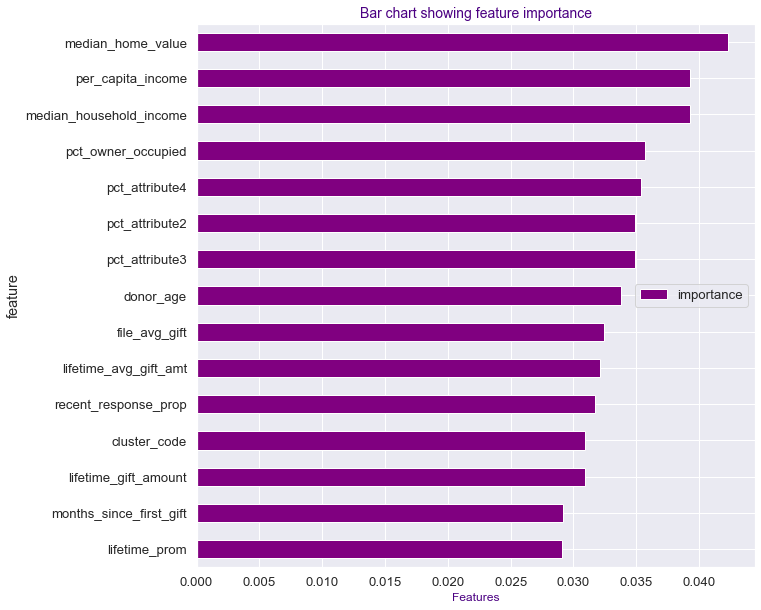

In [75]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:15].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [76]:
rf_impo_df.index

Index(['lifetime_prom', 'months_since_first_gift', 'lifetime_gift_amount',
       'cluster_code', 'recent_response_prop', 'lifetime_avg_gift_amt',
       'file_avg_gift', 'donor_age', 'pct_attribute3', 'pct_attribute2',
       'pct_attribute4', 'pct_owner_occupied', 'median_household_income',
       'per_capita_income', 'median_home_value'],
      dtype='object', name='feature')

### Modelling the undersampled data with the most important features

In [77]:
# Selecting only important features and the y variable
#
X = X_train_cat_encoded[rf_impo_df.index]

y = y


In [78]:
X.shape, y.shape

((9686, 15), (9686,))

In [79]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5564349621472815
The accuracy score is: 0.5564349621472815 and the f1 score is 0.5535157603048146


              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1446
           1       0.56      0.55      0.55      1460

    accuracy                           0.56      2906
   macro avg       0.56      0.56      0.56      2906
weighted avg       0.56      0.56      0.56      2906



array([[818, 628],
       [661, 799]], dtype=int64)

### Undersampling leads to a remarkable imporovement in the recall and f1-score

### Parameter Tuning

In [80]:
# Previewing the parameters to tune
#
RandomForestClassifier()


RandomForestClassifier()

In [81]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [82]:
X.shape

(9686, 15)

In [83]:
# Applying the best parameters to the model


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier(max_depth = 5, n_estimators = 30)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5736407432897453
The accuracy score is: 0.5736407432897453 and the f1 score is 0.578714722883373


              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1446
           1       0.57      0.58      0.58      1460

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906



array([[816, 630],
       [609, 851]], dtype=int64)

*Parameter tuning hasn't decreased or increased the f1 score*

### Cross Validation to check for the stability of the model

In [84]:
# Performing cross validation of ten folds
#
scores = cross_val_score(model, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.49031054586025763
Standard deviation of the cross validation scores is 0.052880129784591605


## Challenging the solution

*Using different models to check whether performance can be improved*

In [85]:
X_test_cat_encoded = X_test_cat_encoded[rf_impo_df.index]

In [86]:
X_test_cat_encoded.shape

(2148, 15)

In [87]:
X_test_cat_encoded.head()

,lifetime_prom,months_since_first_gift,lifetime_gift_amount,cluster_code,recent_response_prop,lifetime_avg_gift_amt,file_avg_gift,donor_age,pct_attribute3,pct_attribute2,pct_attribute4,pct_owner_occupied,median_household_income,per_capita_income,median_home_value
0,25,90,103.0,46,0.071,14.71,14.71,59.0,24,46,53,77,219,12671,655
1,110,129,186.0,43,0.350,6.00,6.00,59.0,33,30,29,70,227,10221,475
2,39,87,76.0,35,0.077,8.44,8.44,30.0,70,27,21,87,544,18212,1117
3,114,129,247.0,2,0.333,6.50,6.50,75.0,28,43,41,84,485,17885,2257
4,43,85,70.0,40,0.278,5.83,5.83,59.0,16,31,7,97,413,14123,789


In [88]:
y__ =  y.copy()
total_test_set_prediction = []
kf = KFold(n_splits=5, random_state=False, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestClassifier(n_estimators=600,random_state=101)

    # fit the model
    rf_model.fit(X_train, y_train)
    # evaluate the model
    preds = rf_model.predict(X_test)
    test_preds  = rf_model.predict(X_test_cat_encoded)
    total_test_set_prediction.append(test_preds)
    #arr = np.stack([arr,test_preds],1)
    y__.iloc[test_index] = preds
    print('k-fold Accuracy : ',accuracy_score(y_test, preds))
print('Cross_validation_Accuracy : ',accuracy_score(y__, y))
test_pred_array = np.array(total_test_set_prediction)
test_pred_array_T = test_pred_array.transpose()
final_test_pred  = mode(test_pred_array_T,1)[0]
final_test_pred = final_test_pred.reshape((-1))

k-fold Accuracy :  0.10577915376676987
k-fold Accuracy :  0.14197212183789365
k-fold Accuracy :  0.5245224574083635
k-fold Accuracy :  0.17707795560144554
k-fold Accuracy :  0.18946824987093444
Cross_validation_Accuracy :  0.22775139376419576


NameError: name 'mode' is not defined

In [68]:
predicted_donors = pd.DataFrame()
predicted_donors['donated'] = final_test_pred
predicted_donors['control_no'] = test_control_no
predicted_donors.head()

,donated,control_no
0,0,139
1,1,142
2,1,282
3,1,368
4,1,387


In [69]:
predicted_donors['donated'].value_counts()

0    1160
1     988
Name: donated, dtype: int64

## Conclusion

* *Out of all the models used to predict whether a person has donates or not, the RandomForestClassifier performs well with an accuracy score of approximately 74.6%*



